In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
health_df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV",encoding='CP949')
health_df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [2]:
# 데이터 정제 과정

# 결측치 찾기
missing_height = len(health_df[health_df['신장(5Cm단위)'].isna()])
missing_weight = len(health_df[health_df['체중(5Kg 단위)'].isna()])
missing_waist = len(health_df[health_df['허리둘레'].isna()])
print("키의 결측치는 ",missing_height,"개 입니다.")
print("몸무게의 결측치는 ",missing_weight,"개 입니다.")
print("허리둘레의 결측치는 ",missing_waist,"개 입니다.")
missing_index = health_df[health_df['허리둘레'].isna()].index
health_df.drop(missing_index,inplace = True)
# 허리둘레 결측치 값 제거
missing_waist1 = len(health_df[health_df['허리둘레'].isna()])
print("허리둘레의 결측치는 ",missing_waist1,"개 입니다.")

키의 결측치는  0 개 입니다.
몸무게의 결측치는  0 개 입니다.
허리둘레의 결측치는  108 개 입니다.
허리둘레의 결측치는  0 개 입니다.


In [3]:
# 남자,여자 허리치수 선형회귀 모델 -> 이영환과 이세은의 허리치수 예측

# 남자에 대한 데이터 추출
man_health_info = health_df[health_df['성별코드'] == 1]
man_health_height_weight = man_health_info[['신장(5Cm단위)','체중(5Kg 단위)']]
man_health_label = man_health_info['허리둘레']
x_train, x_test, y_train, y_test = train_test_split(man_health_height_weight,man_health_label,test_size = 0.2)
# 남자의 허리치수 재는 모델
ridge_man_model = Ridge(alpha=10)
man_poly1 = PolynomialFeatures(); x_train = man_poly1.fit_transform(x_train); x_test = man_poly1.fit_transform(x_test)
ridge_man_model.fit(x_train,y_train)
yeonghwan = man_poly1.fit_transform(np.array([[181,75]]))

# 실제 값 대입
print("모델의 정확률은",int(round(ridge_man_model.score(x_test,y_test),2)*100),"% 입니다.")
print("이영환의 허리 둘레는",round(float(ridge_man_model.predict(yeonghwan)),2),'cm 입니다.')

# 여자에 대한 데이터 추출
woman_health_info = health_df[health_df['성별코드'] == 2]
woman_health_height_weight = woman_health_info[['신장(5Cm단위)','체중(5Kg 단위)']]
woman_health_label = woman_health_info['허리둘레']
x_train, x_test, y_train, y_test = train_test_split(woman_health_height_weight,woman_health_label,test_size = 0.2)
# 여자의 허리치수 재는 모델
ridge_woman_model = Ridge(alpha=10)
woman_poly1 = PolynomialFeatures(); x_train = woman_poly1.fit_transform(x_train); x_test = woman_poly1.fit_transform(x_test);
ridge_woman_model.fit(x_train,y_train)
seeun = woman_poly1.fit_transform(np.array([[166,51]]))
# 실제 값 대입
print("모델의 정확률은",int(round(ridge_woman_model.score(x_test,y_test),2)*100),"% 입니다.")
print("이세은의 허리 둘레는",round(float(ridge_woman_model.predict(seeun)),2),'cm 입니다.')

모델의 정확률은 67 % 입니다.
이영환의 허리 둘레는 85.0 cm 입니다.
모델의 정확률은 64 % 입니다.
이세은의 허리 둘레는 68.52 cm 입니다.


<AxesSubplot:>

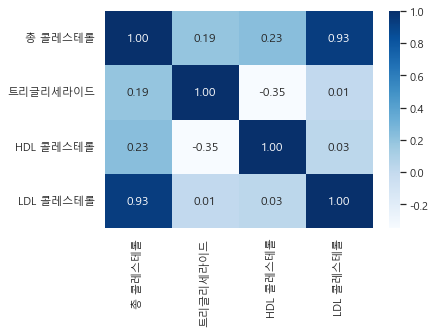

In [4]:
# 콜레스테롤 상관관계 그래프 시각화
import matplotlib.pyplot as plt
# 데이터 정제과정
# 결측치 찾기
missing_index = health_df[health_df['총 콜레스테롤'].isna()].index
health_df.drop(missing_index,inplace = True)
missing_index = health_df[health_df['트리글리세라이드'].isna()].index
health_df.drop(missing_index,inplace = True)
missing_index = health_df[health_df['HDL 콜레스테롤'].isna()].index
health_df.drop(missing_index,inplace = True)
missing_index = health_df[health_df['LDL 콜레스테롤'].isna()].index
health_df.drop(missing_index,inplace = True)

# 상관계수 그림으로 확인
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
col_health_df = health_df[['총 콜레스테롤','트리글리세라이드','HDL 콜레스테롤','LDL 콜레스테롤']]
sns.heatmap(data = col_health_df.corr(), annot = True, fmt = '.2f', cmap='Blues')

Text(0.5, 1.0, '연령대 별 검진 인원 수 분포')

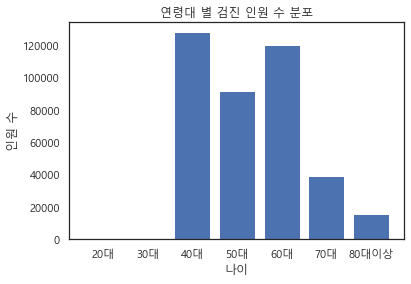

In [5]:
# 건강검진 연령대 분포 그래프

# 데이터 추출
age = []
for i in range(1,19,2):
    age1 = health_df[health_df['연령대 코드(5세단위)']==i]['연령대 코드(5세단위)'].count()
    age2 = health_df[health_df['연령대 코드(5세단위)']==i+1]['연령대 코드(5세단위)'].count()
    age.append(age1+age2)
age.remove(0); age.remove(0);
x = ['20대','30대','40대','50대','60대','70대','80대이상']

# 그래프 그리기
plt.bar(x,age)
plt.xlabel('나이')
plt.ylabel('인원 수')
plt.title('연령대 별 검진 인원 수 분포')

In [6]:
# 지역별 건강검진 정보 시각화
health_df = pd.read_csv("국민건강보험공단_건강검진정보_20211229.CSV",encoding='CP949')
health_df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [7]:
sido_df = health_df[['시도코드', '연령대 코드(5세단위)']]
sido_df

,시도코드,연령대 코드(5세단위)
0,36,9
1,27,13
2,11,12
3,31,13
4,41,12
...,...,...
999995,41,13
999996,26,12
999997,48,9
999998,48,9


<AxesSubplot:>

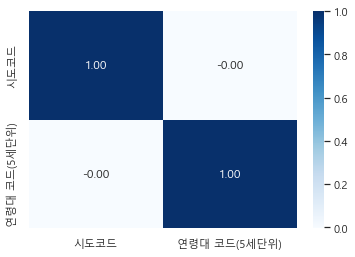

In [8]:
# 상관계수 그림으로 확인
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
col_health_df2 = sido_df
sns.heatmap(data = col_health_df2.corr(), annot = True, fmt = '.2f', cmap='Blues')

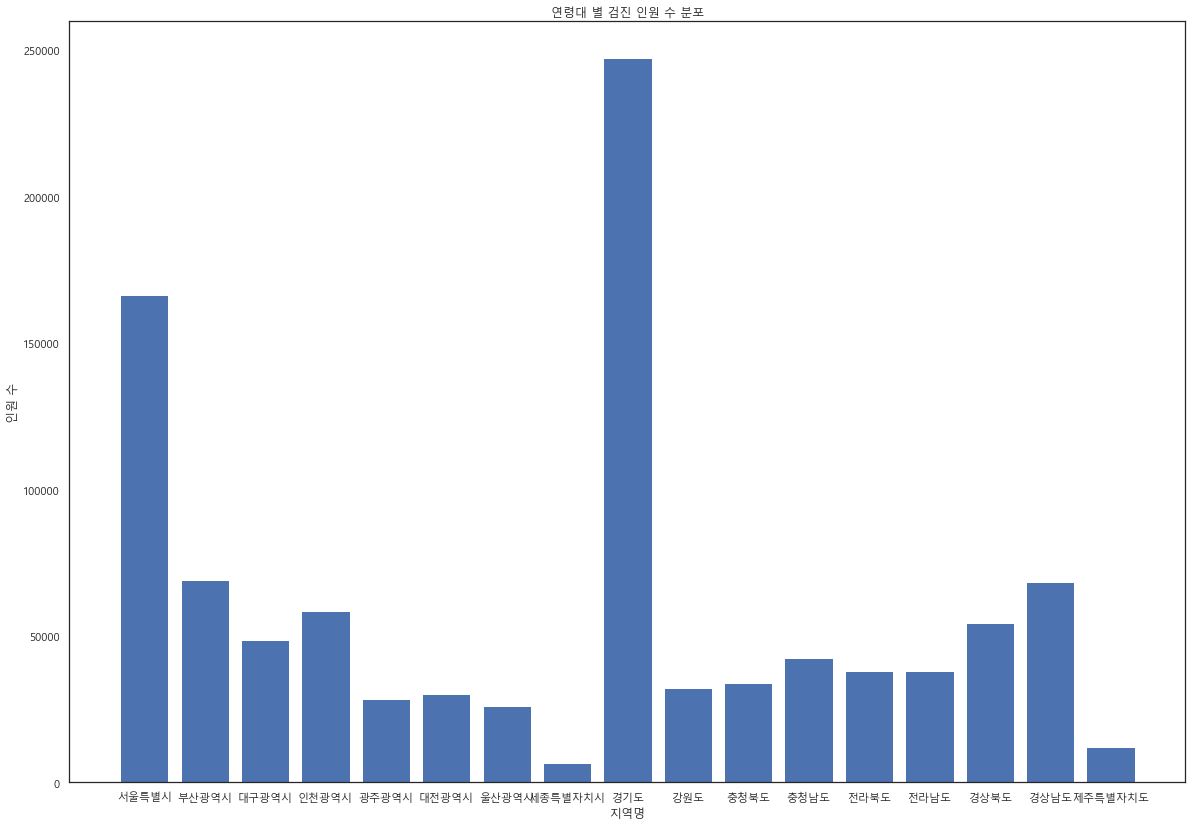

In [52]:

# 데이터 추출
sido = []
for i in range(60):
    if (health_df[health_df['시도코드']==i]['시도코드'].count() > 0):
        sido.append(health_df[health_df['시도코드']==i]['시도코드'].count())

x1 = ['서울특별시',
'부산광역시',
'대구광역시',
'인천광역시',
'광주광역시',
'대전광역시',
'울산광역시',
'세종특별자치시',
'경기도',
'강원도',
'충청북도',
'충청남도',
'전라북도',
'전라남도',
'경상북도',
'경상남도',
'제주특별자치도']

# 그래프 그리기
plt.figure(figsize=(20,14))
plt.bar(x1,sido)
plt.xlabel('지역명')
plt.ylabel('인원 수')
plt.title('연령대 별 검진 인원 수 분포')
plt.savefig('시도별 분포.png', dpi=300)

In [10]:
sido_df.reset_index

<bound method DataFrame.reset_index of         시도코드  연령대 코드(5세단위)
0         36             9
1         27            13
2         11            12
3         31            13
4         41            12
...      ...           ...
999995    41            13
999996    26            12
999997    48             9
999998    48             9
999999    28            11

[1000000 rows x 2 columns]>

In [11]:
# sido_df.columns=['index', '시도코드', '연령대 코드(5세단위)']
# sido_df

In [12]:
sido_df

,시도코드,연령대 코드(5세단위)
0,36,9
1,27,13
2,11,12
3,31,13
4,41,12
...,...,...
999995,41,13
999996,26,12
999997,48,9
999998,48,9


In [13]:
sido_df['시도코드_누적'] = sido_df.groupby(['연령대 코드(5세단위)'])['시도코드'].cumsum(axis=0)
sido_df

C:\Users\Flora\anaconda3\envs\silcream\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,시도코드,연령대 코드(5세단위),시도코드_누적
0,36,9,36
1,27,13,27
2,11,12,11
3,31,13,58
4,41,12,52
...,...,...,...
999995,41,13,5231763
999996,26,12,4862138
999997,48,9,5325490
999998,48,9,5325538


In [14]:
sido_df = sido_df.sort_values(by=['시도코드', '연령대 코드(5세단위)'], ascending=True)
sido_df

,시도코드,연령대 코드(5세단위),시도코드_누적
41,11,9,283
98,11,9,528
99,11,9,539
106,11,9,550
159,11,9,871
...,...,...,...
901671,49,18,206989
953745,49,18,218717
983739,49,18,225363
984423,49,18,225503


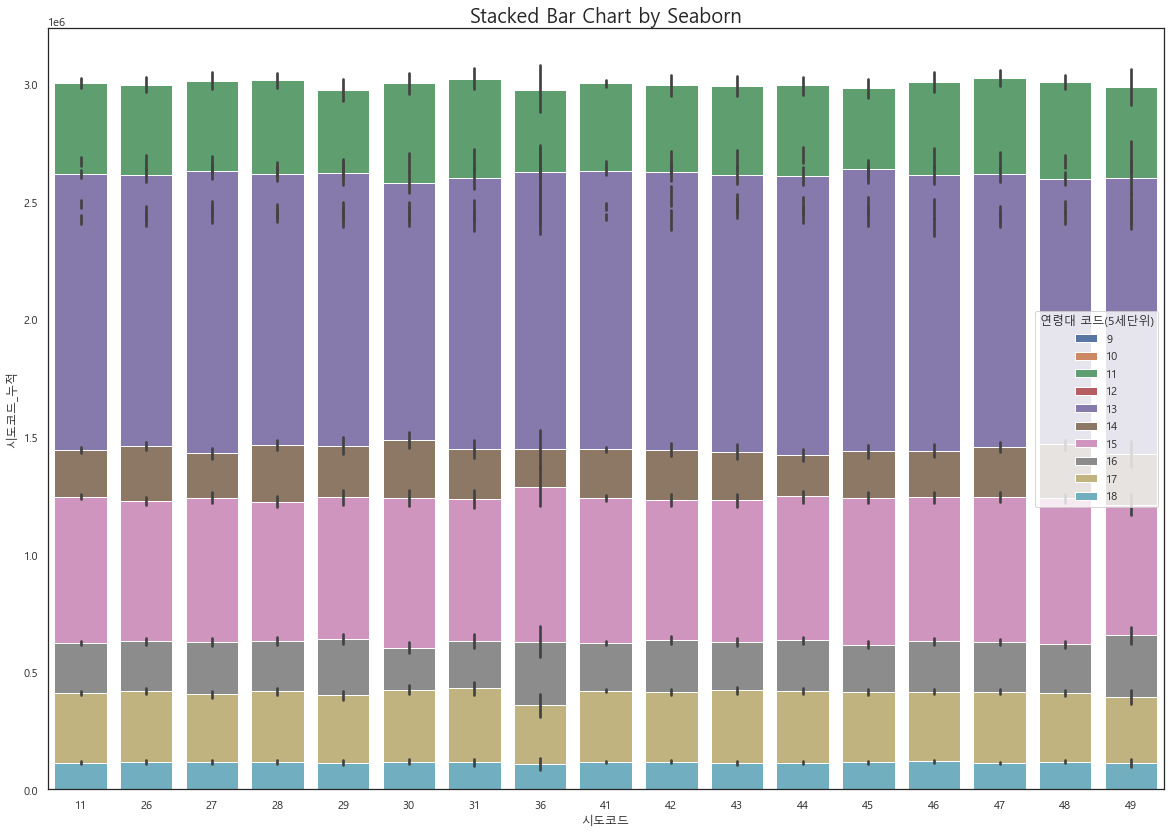

In [15]:
# Stacked Bar Chart


plt.figure(figsize=(20,14))
sns.barplot(x='시도코드', y='시도코드_누적', hue='연령대 코드(5세단위)', data=sido_df, 

           dodge=False) # stacked bar chart

plt.title('Stacked Bar Chart by Seaborn', fontsize='20')

plt.show()

In [16]:
sido

[166231,
 69025,
 48413,
 58345,
 28532,
 30057,
 26001,
 6460,
 247369,
 32023,
 34009,
 42582,
 38066,
 38041,
 54438,
 68530,
 11878]

In [17]:
['서울특별시',
'부산광역시',
'대구광역시',
'인천광역시',
'광주광역시',
'대전광역시',
'울산광역시',
'세종특별자치시',
'경기도',
'강원도',
'충청북도',
'충청남도',
'전라북도',
'전라남도',
'경상북도',
'경상남도',
'제주특별자치도']

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [23]:
sido_df = sido_df.drop(columns = ['시도코드_누적'])
sido_df

,시도코드,연령대 코드(5세단위)
41,11,9
98,11,9
99,11,9
106,11,9
159,11,9
...,...,...
901671,49,18
953745,49,18
983739,49,18
984423,49,18


In [26]:
sido_df = sido_df.reset_index()
sido_df

,index,시도코드,연령대 코드(5세단위)
0,41,11,9
1,98,11,9
2,99,11,9
3,106,11,9
4,159,11,9
...,...,...,...
999995,901671,49,18
999996,953745,49,18
999997,983739,49,18
999998,984423,49,18


In [27]:
sido_df = sido_df.reset_index()
sido_df

,level_0,index,시도코드,연령대 코드(5세단위)
0,0,41,11,9
1,1,98,11,9
2,2,99,11,9
3,3,106,11,9
4,4,159,11,9
...,...,...,...,...
999995,999995,901671,49,18
999996,999996,953745,49,18
999997,999997,983739,49,18
999998,999998,984423,49,18


In [29]:
sido_df = sido_df.drop(columns = ['level_0', 'index'])
sido_df

,시도코드,연령대 코드(5세단위)
0,11,9
1,11,9
2,11,9
3,11,9
4,11,9
...,...,...
999995,49,18
999996,49,18
999997,49,18
999998,49,18


In [38]:
listdata = []
for i in range(1000000):
    listdata.append(1)
listdata

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [39]:
sido_df['count'] = listdata
sido_df

,시도코드,연령대 코드(5세단위),count
0,11,9,1
1,11,9,1
2,11,9,1
3,11,9,1
4,11,9,1
...,...,...,...
999995,49,18,1
999996,49,18,1
999997,49,18,1
999998,49,18,1


In [40]:
sido_df.groupby(['연령대 코드(5세단위)', '시도코드']).sum()

count
연령대 코드(5세단위) 시도코드       
9            11    25643
             26     9676
             27     7157
             28     9359
             29     4810
...                  ...
18           45      494
             46      517
             47      596
             48      438
             49       62

[170 rows x 1 columns]

In [45]:
sido_df1 = sido_df.groupby(['시도코드', '연령대 코드(5세단위)']).sum()

In [46]:
sido_df1.stack()
sido_df1

count
시도코드 연령대 코드(5세단위)       
11   9             25643
     10            22475
     11            28042
     12            22165
     13            26906
...                  ...
49   14              920
     15              855
     16              375
     17              280
     18               62

[170 rows x 1 columns]

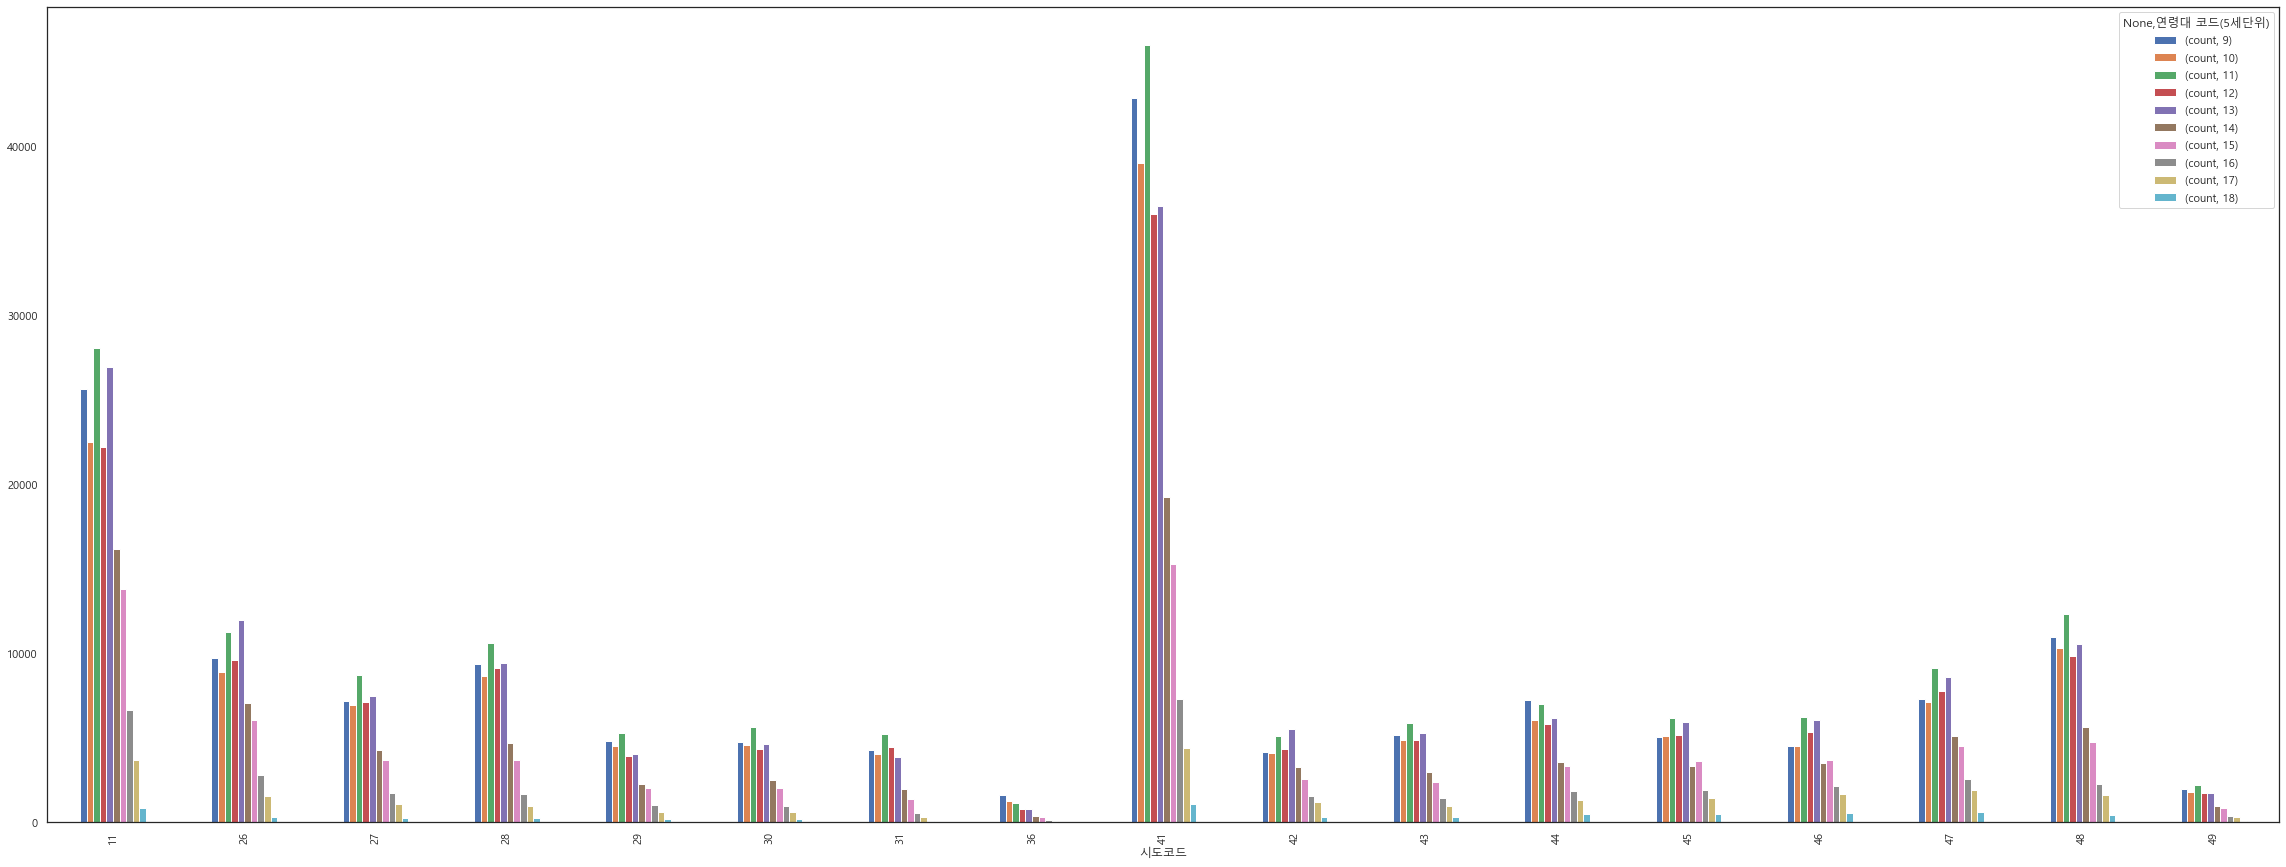

In [47]:
plt.rcParams['figure.figsize'] = (40,15)
sido_df1.unstack().plot(kind = 'bar')
plt.savefig('시도코드.png', dpi=300)

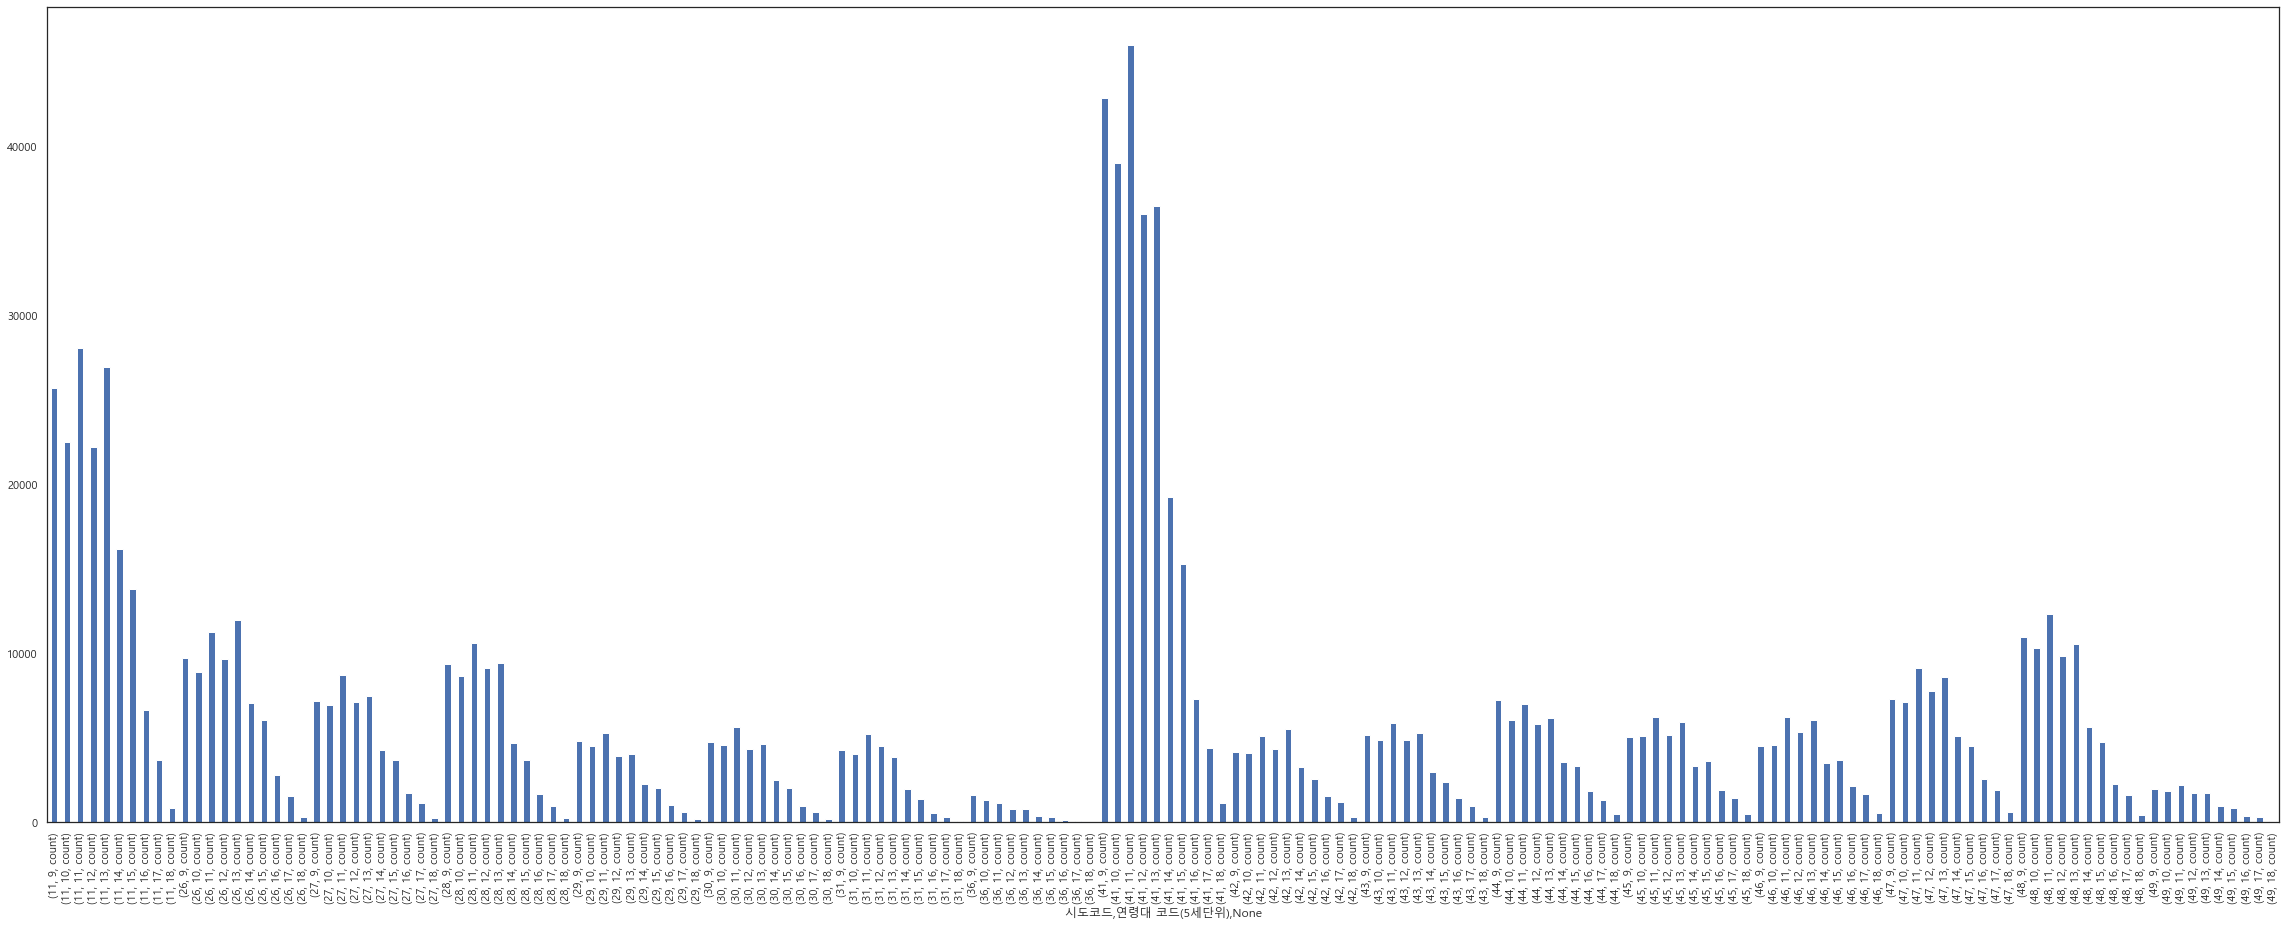

In [48]:
plt.rcParams['figure.figsize'] = (40,15)
sido_df1.stack().plot(kind = 'bar')
plt.savefig('시도코드2.png', dpi=300)

In [41]:
sido_df2 = sido_df.groupby(['연령대 코드(5세단위)', '시도코드']).sum()

In [20]:
# sido_df.plot.bar(stacked=True, figsize=(10,7))

In [42]:
sido_df2.stack()
sido_df2

count
연령대 코드(5세단위) 시도코드       
9            11    25643
             26     9676
             27     7157
             28     9359
             29     4810
...                  ...
18           45      494
             46      517
             47      596
             48      438
             49       62

[170 rows x 1 columns]

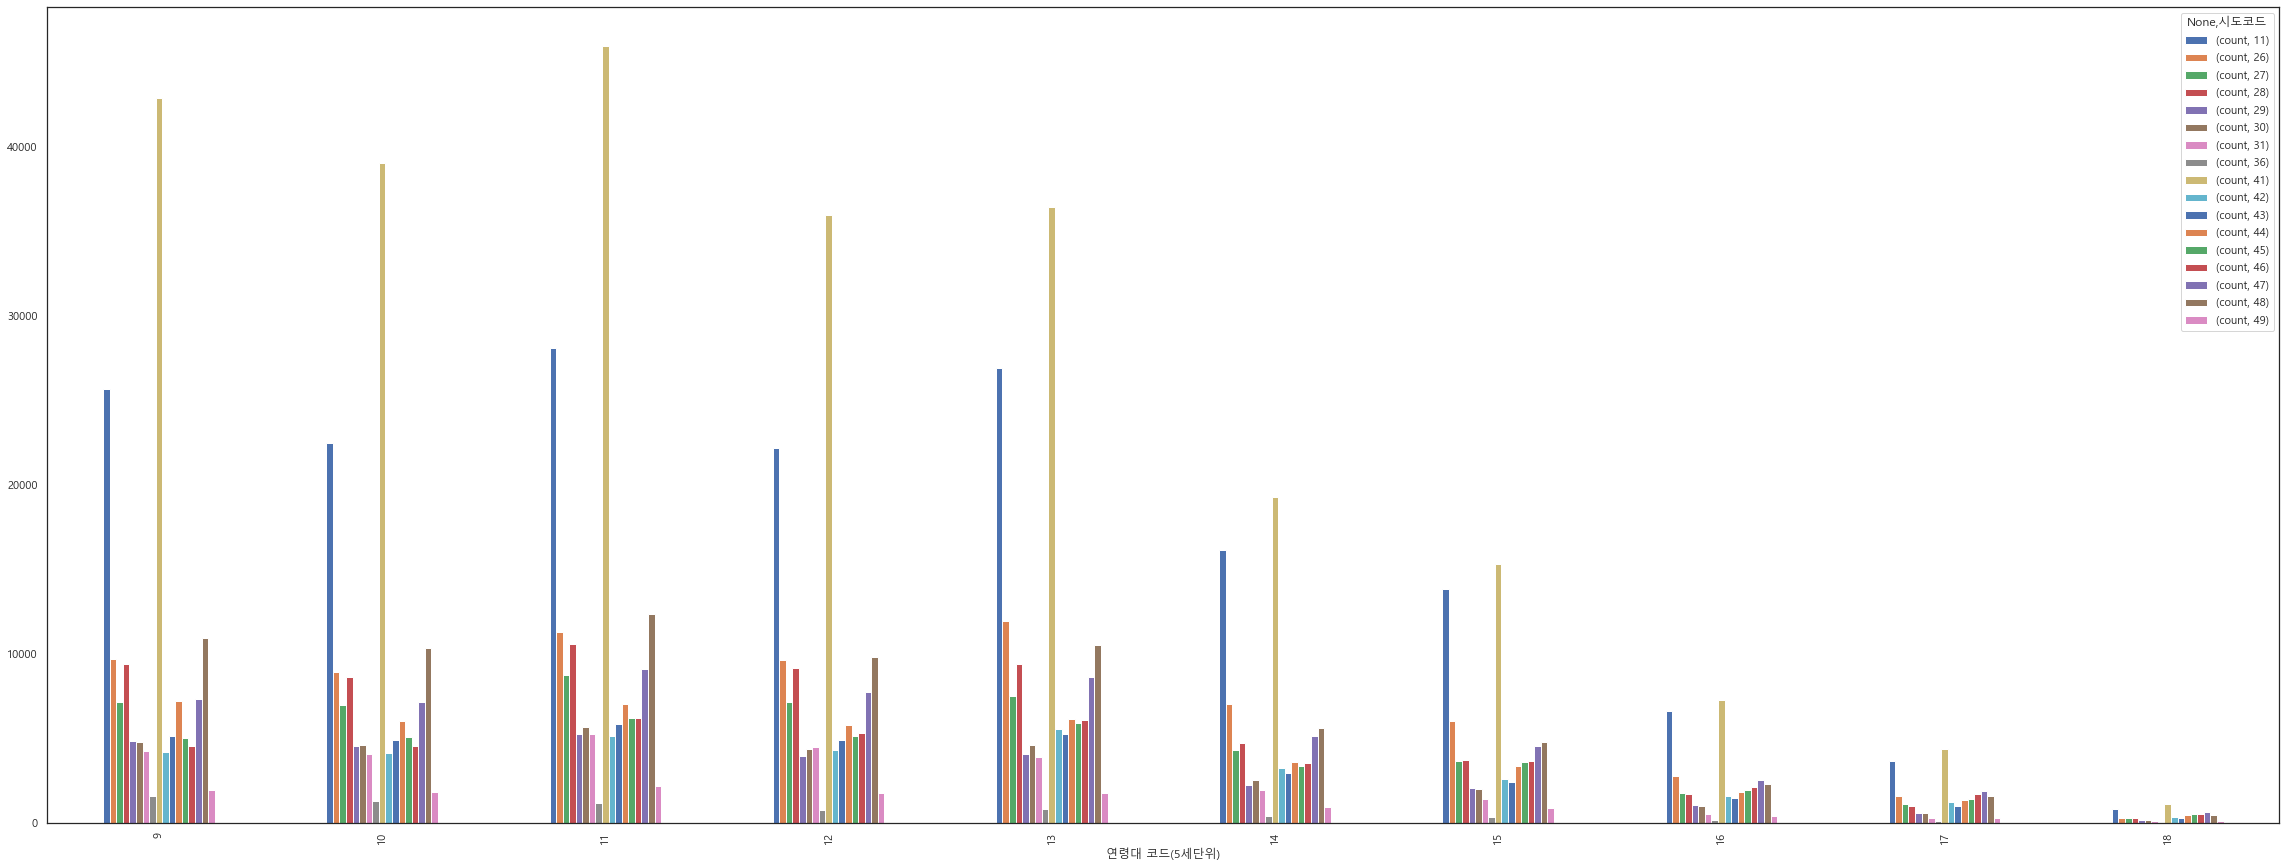

In [44]:
plt.rcParams['figure.figsize'] = (40,15)
sido_df2.unstack().plot(kind = 'bar')
plt.savefig('연령대 코드.png', dpi=300)